In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import *

# Read Dataset

In [3]:
train_path = '/kaggle/input/intel-image-classification/seg_train/seg_train'
test_path = '/kaggle/input/intel-image-classification/seg_test/seg_test'

In [4]:
image_classes = os.listdir('/kaggle/input/intel-image-classification/seg_train/seg_train')
image_classes

['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier']

# Data Visualization

In [5]:
def plot_image(images_classes):
    plt.figure(figsize = (15,15))
    
    for i , category in enumerate(image_classes):
        image_path = train_path + '/' + category
        image_in_folder = os.listdir(image_path)
        
        first_image = image_in_folder[0]
        first_image_path = image_path + '/' + first_image
        
        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255
        
        plt.subplot(2,3 , i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
        
    plt.show()

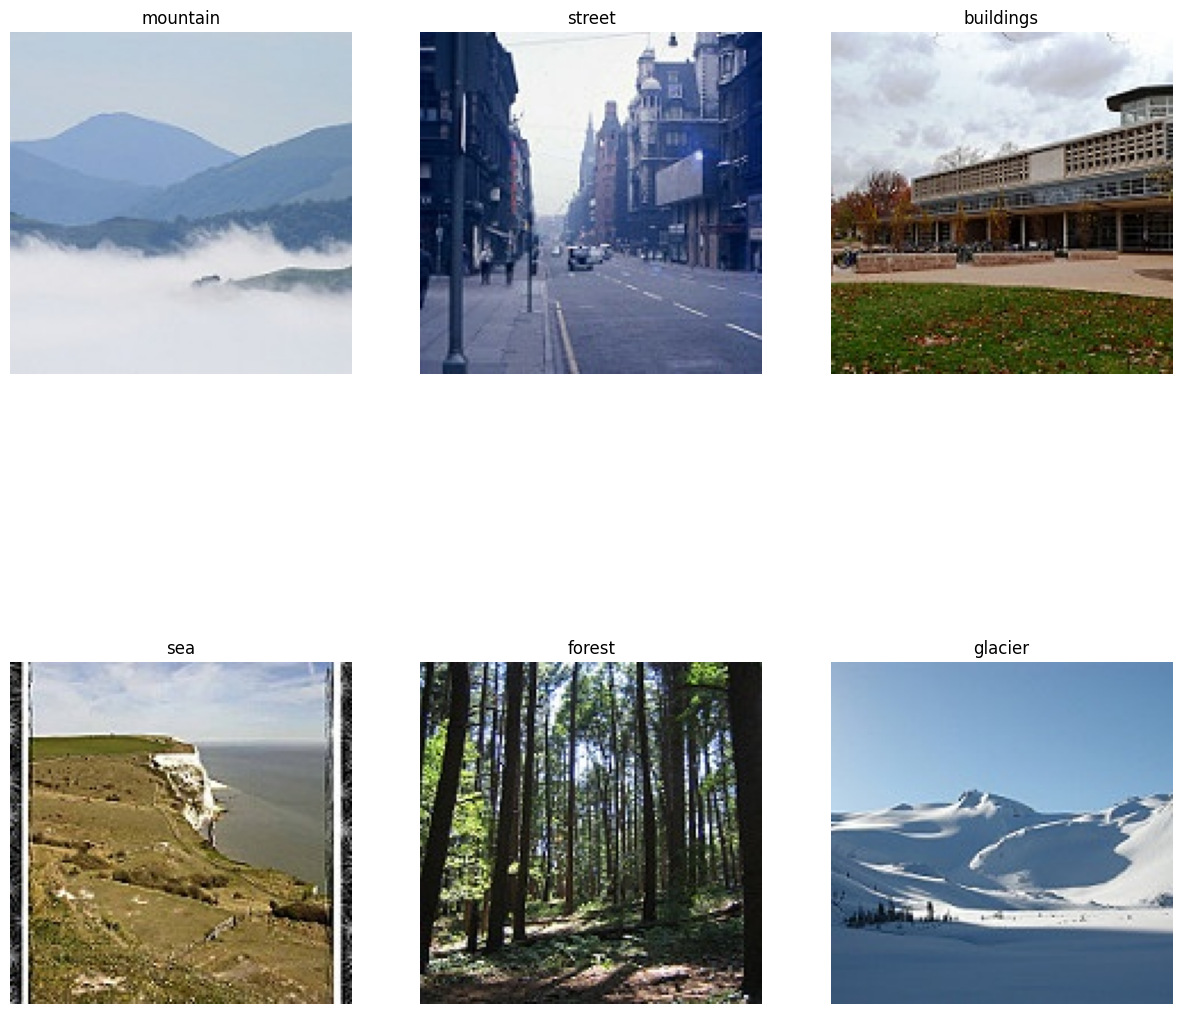

In [6]:
plot_image(image_classes)

# Image Preprocessing

In [7]:
data_category = ImageDataGenerator(rescale = 1/255)

In [8]:
train_data = data_category.flow_from_directory(train_path,
                                               target_size = (150,150),
                                               batch_size = 128)

Found 14034 images belonging to 6 classes.


In [9]:
test_data = data_category.flow_from_directory(test_path,
                                               target_size = (150,150),
                                               batch_size = 64)

Found 3000 images belonging to 6 classes.


# Model Building 

In [10]:
#model building
model = Sequential()

In [11]:
#add conv layer with filter, kernel_size , activation and input shape
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                    activation = 'relu', input_shape = [150,150, 3]))
#add maxpooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#add conv layer with filter, kernel_size , activation 
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                    activation = 'relu'))
#add maxpooling layer
model.add(MaxPooling2D())

#add conv layer with filter, kernel_size , activation 
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                    activation = 'relu'))
#add maxpooling layer
model.add(MaxPooling2D())

# add flatten layer
model.add(Flatten())

# fully connected layer
model.add(Dense(128,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
# add output layer
model.add(Dense(6,activation = 'softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


# Model Compile & Fit

In [12]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics =['accuracy'])

In [13]:
model_history = model.fit(train_data,
                         epochs = 5,
                         validation_data = test_data)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/110 ━━━━━━━━━━━━━━━━━━━━ 43:26 24s/step - accuracy: 0.1484 - loss: 1.7941

I0000 00:00:1713278222.889824     855 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713278222.905677     855 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 67/110 ━━━━━━━━━━━━━━━━━━━━ 18s 422ms/step - accuracy: 0.3766 - loss: 1.5056

W0000 00:00:1713278250.715192     854 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


110/110 ━━━━━━━━━━━━━━━━━━━━ 77s 483ms/step - accuracy: 0.4388 - loss: 1.3738 - val_accuracy: 0.6437 - val_loss: 0.9293
Epoch 2/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 30s 255ms/step - accuracy: 0.7131 - loss: 0.7576 - val_accuracy: 0.7853 - val_loss: 0.5974
Epoch 3/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 29s 245ms/step - accuracy: 0.7867 - loss: 0.5878 - val_accuracy: 0.8107 - val_loss: 0.5307
Epoch 4/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 29s 250ms/step - accuracy: 0.8389 - loss: 0.4481 - val_accuracy: 0.8197 - val_loss: 0.5181
Epoch 5/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 29s 247ms/step - accuracy: 0.8673 - loss: 0.3700 - val_accuracy: 0.8067 - val_loss: 0.5515


# Model Preformance Evaluation

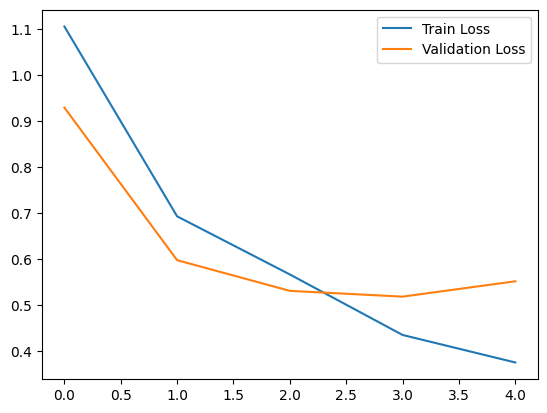

In [14]:
plt.plot(model_history.history['loss'], label = 'Train Loss')
plt.plot(model_history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

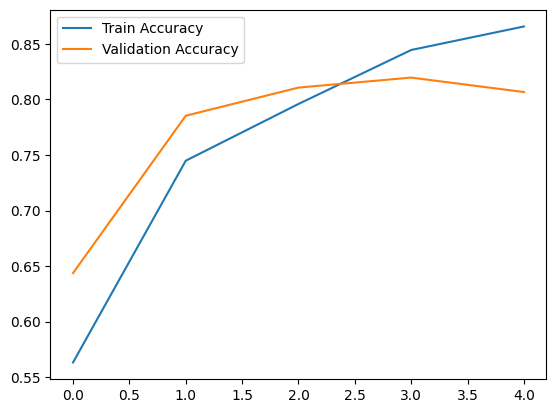

In [15]:
plt.plot(model_history.history['accuracy'], label = 'Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

# Model Evaluate

In [16]:
model.evaluate(test_data)

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.8050 - loss: 0.5717


[0.5515056252479553, 0.8066666722297668]

In [17]:
model.evaluate(train_data)

  1/110 ━━━━━━━━━━━━━━━━━━━━ 1:21 744ms/step - accuracy: 0.8828 - loss: 0.3388

W0000 00:00:1713278397.751797     853 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


110/110 ━━━━━━━━━━━━━━━━━━━━ 25s 219ms/step - accuracy: 0.8794 - loss: 0.3460


W0000 00:00:1713278421.596058     853 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[0.34767019748687744, 0.8792931437492371]

# Predict new Image

In [18]:
testing_image = '/kaggle/input/intel-image-classification/seg_pred/seg_pred/10096.jpg'

In [19]:
class_map = dict([value , key] for key, value in train_data.class_indices.items())
class_map

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

In [25]:
def prediction(testing_image, actual_label):
    
    #load & preprocessing image
    test_img = image.load_img(testing_image, target_size = (150,150))
    test_img_arr = image.img_to_array(test_img) /255
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0],
                                          test_img_arr.shape[1],
                                          test_img_arr.shape[2]))
    
    #make prediction
    predicted_class = np.argmax(model.predict(test_img_input))
    predicted_img = class_map[predicted_class]
    
    plt.figure(figsize = (4,4))
    plt.imshow(test_img_arr)
    plt.title("Actual Label : {}, Predicted Label : {}".format(actual_label,
                                                              predicted_img))
    plt.grid()
    plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


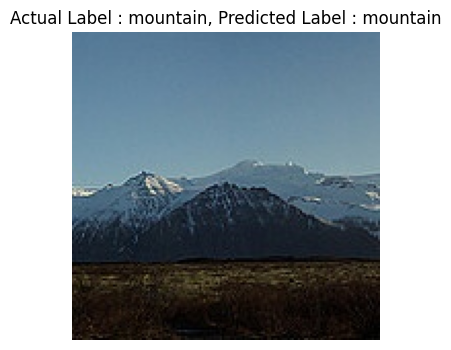

In [27]:
prediction(testing_image, actual_label = 'mountain')

In [30]:
testing_image = '/kaggle/input/intel-image-classification/seg_pred/seg_pred/10066.jpg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


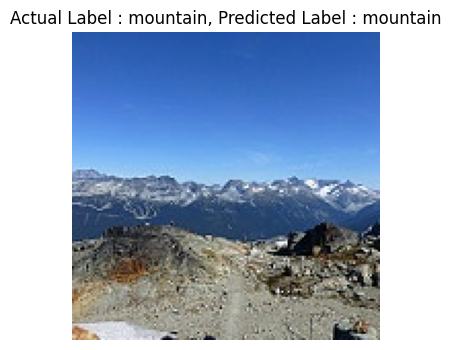

In [31]:
prediction(testing_image, actual_label = 'mountain')